# **EDA**

In [ ]:
#importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/train (4).csv')       # reading the data with variable named df

In [ ]:
df

,Customer_ID,Gender,Senior_Citizen,Partner,Dependents,Tenure,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn
0,7242-QZLXF,Male,0,No,Yes,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,25.30,25.3,Yes
1,8325-QRPZR,Female,0,No,No,7,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,75.15,525,No
2,7874-ECPQJ,Female,0,No,Yes,4,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer (automatic),20.05,85.5,No
3,2476-YGEFM,Female,0,No,No,29,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),76.00,2215.25,No
4,2276-YDAVZ,Female,0,No,No,3,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),75.10,270.7,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,0684-AOSIH,Male,0,Yes,No,1,Yes,No,Fiber optic,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.00,95,Yes
5278,5982-PSMKW,Female,0,Yes,Yes,23,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),91.10,2198.3,No
5279,8044-BGWPI,Male,0,Yes,Yes,12,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.15,306.05,No
5280,7450-NWRTR,Male,1,No,No,12,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15,Yes


**Dropping** column **CUSTOMER ID** because it's different for every customer and does not have an effect on **Churn**

In [ ]:
df.drop(columns = 'Customer_ID', inplace =True)       # Customer ID drop

In [ ]:
df.isnull().sum()           # There is no null values as seen

Gender               0
Senior_Citizen       0
Partner              0
Dependents           0
Tenure               0
Phone_Service        0
Multiple_Lines       0
Internet_Service     0
Online_Security      0
Online_Backup        0
Device_Protection    0
Tech_Support         0
Streaming_TV         0
Streaming_Movies     0
Contract             0
Paperless_Billing    0
Payment_Method       0
Monthly_Charges      0
Total_Charges        0
Churn                0
dtype: int64

But while doing Correlation analysis, we found that there are 8 wrong values(' ') in Total_Charge column. So we're replacing it with **median**.

In [ ]:
lst = [2382,2551,3622,4671,4678,4991,5247,2067]
df.loc[lst,'Total_Charges']= np.nan
 # replacing values with the median
df.loc[lst,'Total_Charges']= df['Total_Charges'].median()

In [ ]:
df.describe()                                       # description of the dataf

,Senior_Citizen,Tenure,Monthly_Charges
count,5282.000000,5282.000000,5282.000000
mean,0.159788,32.414237,64.762609
std,0.366444,24.489554,30.125932
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.450000
50%,0.000000,29.000000,70.400000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.600000


In [ ]:
df.info()       #info of dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             5282 non-null   object 
 1   Senior_Citizen     5282 non-null   int64  
 2   Partner            5282 non-null   object 
 3   Dependents         5282 non-null   object 
 4   Tenure             5282 non-null   int64  
 5   Phone_Service      5282 non-null   object 
 6   Multiple_Lines     5282 non-null   object 
 7   Internet_Service   5282 non-null   object 
 8   Online_Security    5282 non-null   object 
 9   Online_Backup      5282 non-null   object 
 10  Device_Protection  5282 non-null   object 
 11  Tech_Support       5282 non-null   object 
 12  Streaming_TV       5282 non-null   object 
 13  Streaming_Movies   5282 non-null   object 
 14  Contract           5282 non-null   object 
 15  Paperless_Billing  5282 non-null   object 
 16  Payment_Method     5282 

The **Dtype** of many features in the Dataframe is **Object**. **Changing** Values Type


Assigning 1 to Male and 0 to Female. (I'm not misogynist bss krte wkt dhayn nahhi rha)

In [ ]:
for i in range(df.shape[0]):
    if df.at[i,'Gender'] == 'Male':
        df.at[i,'Gender'] = 1
    else:
        df.at[i,'Gender'] = 0

In [ ]:
df.Partner.unique() # printing how many types of values does Partner have

array(['No', 'Yes'], dtype=object)

The values is either Yes or No. So **changing** yes with **1** and No with **0**.

In [ ]:
for i in range(df.shape[0]):
    if df.at[i,'Partner'] == 'Yes':
        df.at[i,'Partner'] = 1
    else:
        df.at[i,'Partner'] = 0

In [ ]:
df.Dependents.unique()  # printing how many types of values does Dependent have

array(['Yes', 'No'], dtype=object)

The values is either Yes or No. So changing yes with 1 and No with 0

In [ ]:
for i in range(df.shape[0]):
    if df.at[i,'Dependents'] == 'Yes':
        df.at[i,'Dependents'] = 1
    else:
        df.at[i,'Dependents'] = 0

In [ ]:
df.Phone_Service.unique()    # printing how many types of values does Phone Service have

array(['No', 'Yes'], dtype=object)

The values is either Yes or No. So changing yes with 1 and No with 0.

In [ ]:
for i in range(df.shape[0]):
    if df.at[i,'Phone_Service'] == 'Yes':
        df.at[i,'Phone_Service'] = 1
    else:
        df.at[i,'Phone_Service'] = 0


In [ ]:
df.Multiple_Lines.unique()    # printing how many types of values does Phone Service have

array(['No phone service', 'No', 'Yes'], dtype=object)

The values is either **Yes, No and No phone service**. Now assigning **1 to yes, 0 to No and 3 to No Phone Service**. We assigned 3 to No_Phone_service because in future we will going to **split the dataset in 3 parts**.

In [ ]:
for i in range(df.shape[0]):
    if df.at[i,'Multiple_Lines'] == 'Yes':
        df.at[i,'Multiple_Lines'] = 1
    elif df.at[i,'Multiple_Lines'] == 'No':
        df.at[i,'Multiple_Lines'] = 0
    else:
        df.at[i,'Multiple_Lines'] = 3

In [ ]:
df.Internet_Service.unique()    # printing how many types of values does Internet_Service Service have

array(['DSL', 'Fiber optic', 'No'], dtype=object)

There are **3 values** in Internet Service. Which either includes the type of the internet or no internet. So, we splited this column in two parts one is Customer have Internet Service or not and if customer have Internet Service then other is what type otherwise 3.

In [ ]:
for i in range(df.shape[0]):
  if df.at[i,'Internet_Service'] == 'Fiber optic':
    df.at[i,'Internet_type'] = 1                                                  # assigning 1 to fiber optic
    df.at[i,'Internet_Service'] = 1
  elif df.at[i,'Internet_Service'] == 'DSL':
    df.at[i,'Internet_type'] = 0                                                  # assigning 0 to DSL
    df.at[i,'Internet_Service'] = 1
  else:
    df.at[i,'Internet_type'] = 3                                             # np.nan if not, logic is simillar as in case of Phone Service
    df.at[i,'Internet_Service'] = 0

In [ ]:
df.Online_Security.unique()   # printing how many types of values does Online_Security Service have

array(['No', 'No internet service', 'Yes'], dtype=object)

Assigning 1 to yes, 0 to No and 3 to No Internet Service. (same logic)

In [ ]:
lst = ['Online_Security', 'Online_Backup',	'Device_Protection',	'Tech_Support',	'Streaming_TV','Streaming_Movies']    # doing this again and again is boring. So we used Loop.
for j in lst:
    for i in range(df.shape[0]):
        if df.at[i,j] == 'Yes':
            df.at[i,j] = 1
        elif df.at[i,j] == 'No':
            df.at[i,j] = 0
        else:
            df.at[i,j] = 3

In [ ]:
df.Contract.unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [ ]:
for i in range(df.shape[0]):
    if df.at[i,'Contract'] == 'Two year':
        df.at[i,'Contract'] = 2                                                   # 2 to 2 Year
    elif df.at[i,'Contract'] == 'One year':
        df.at[i,'Contract'] = 1                                                   # 1 to 1 year
    else:
        df.at[i,'Contract'] = 0

In [ ]:
df.Paperless_Billing.unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
for i in range(df.shape[0]):
    if df.at[i,'Paperless_Billing'] == 'Yes':
        df.at[i,'Paperless_Billing'] = 1
    else:
        df.at[i,'Paperless_Billing'] = 0

In [ ]:
df.Payment_Method.unique()

array(['Electronic check', 'Bank transfer (automatic)',
       'Credit card (automatic)', 'Mailed check'], dtype=object)

In [ ]:
for i in range(df.shape[0]):
    if df.at[i,'Payment_Method'] == 'Electronic check':
        df.at[i,'Payment_Method'] = 2
    elif df.at[i,'Payment_Method'] == 'Bank transfer (automatic)':
        df.at[i,'Payment_Method'] = 1
    elif df.at[i,'Payment_Method'] == 'Credit card (automatic)':
        df.at[i,'Payment_Method'] = 3
    else:
        df.at[i,'Payment_Method'] = 0

In [ ]:
for i in range(df.shape[0]):
    if df.at[i,'Churn'] == 'Yes':
        df.at[i,'Churn'] = 1
    else:
        df.at[i,'Churn'] = 0

In [ ]:
df = df.apply(pd.to_numeric)

In [ ]:
df.nunique()

Gender                  2
Senior_Citizen          2
Partner                 2
Dependents              2
Tenure                 73
Phone_Service           2
Multiple_Lines          3
Internet_Service        2
Online_Security         3
Online_Backup           3
Device_Protection       3
Tech_Support            3
Streaming_TV            3
Streaming_Movies        3
Contract                3
Paperless_Billing       2
Payment_Method          4
Monthly_Charges      1464
Total_Charges        4972
Churn                   2
Internet_type           3
dtype: int64

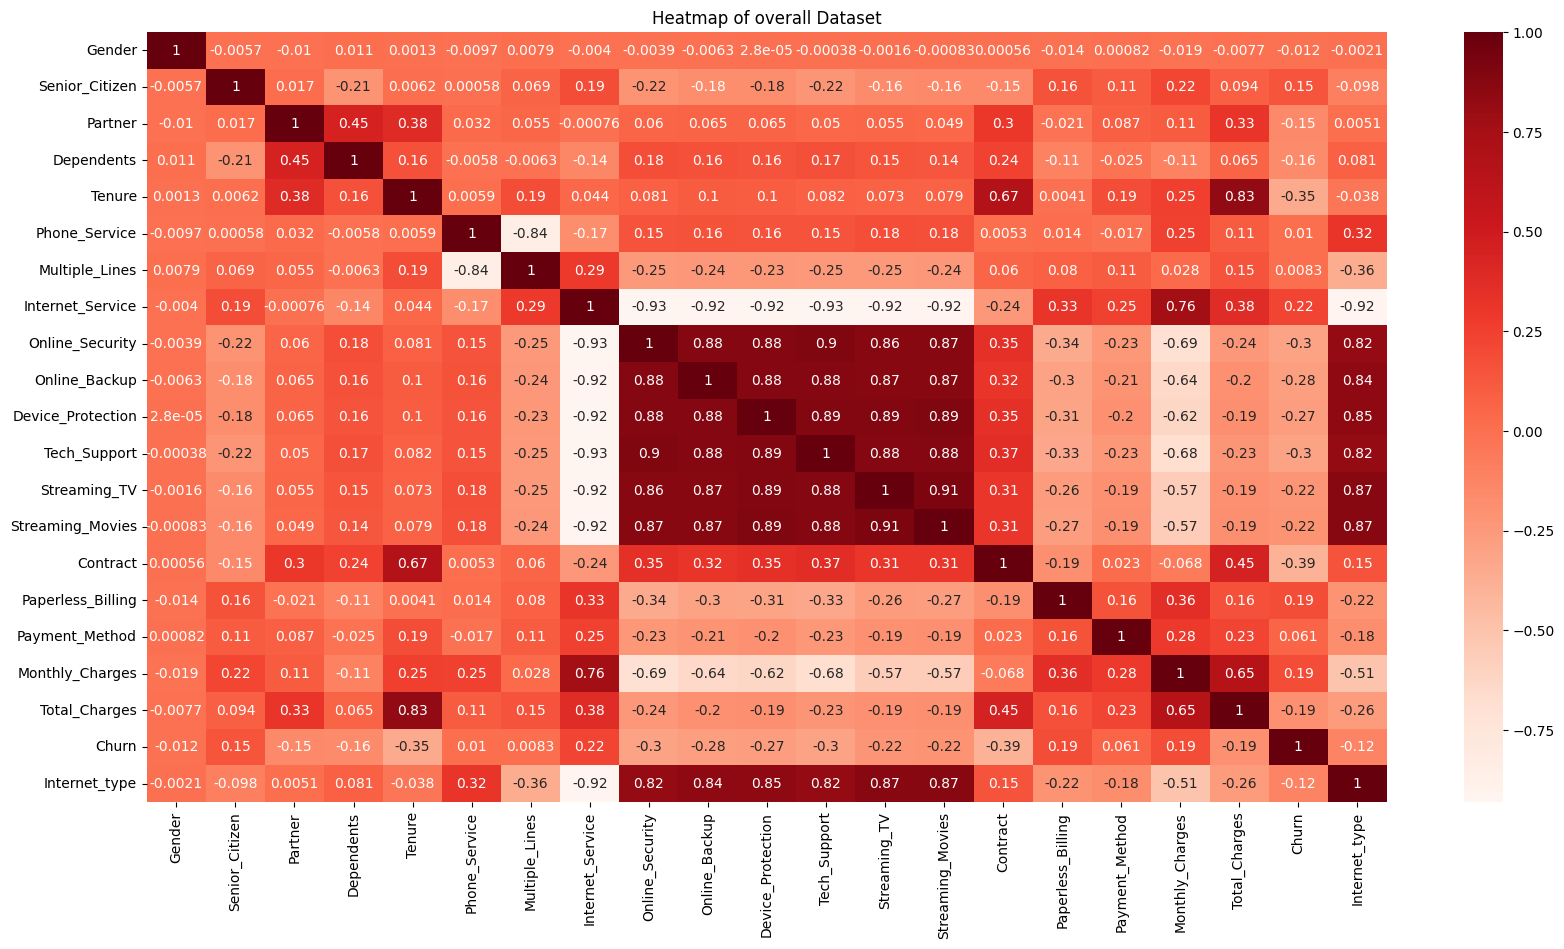

In [ ]:
plt.figure(figsize=(20,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.title('Heatmap of overall Dataset')
plt.show()

In [ ]:
df.drop(columns='Tenure',inplace=True)

In [ ]:
dfa = df[(df['Internet_Service']==0) & (df['Phone_Service']==1)].copy(deep=True)
dfa.drop(columns=['Phone_Service','Internet_Service',
       'Online_Security', 'Online_Backup', 'Device_Protection', 'Tech_Support',
       'Streaming_TV', 'Streaming_Movies','Internet_type'],inplace = True)

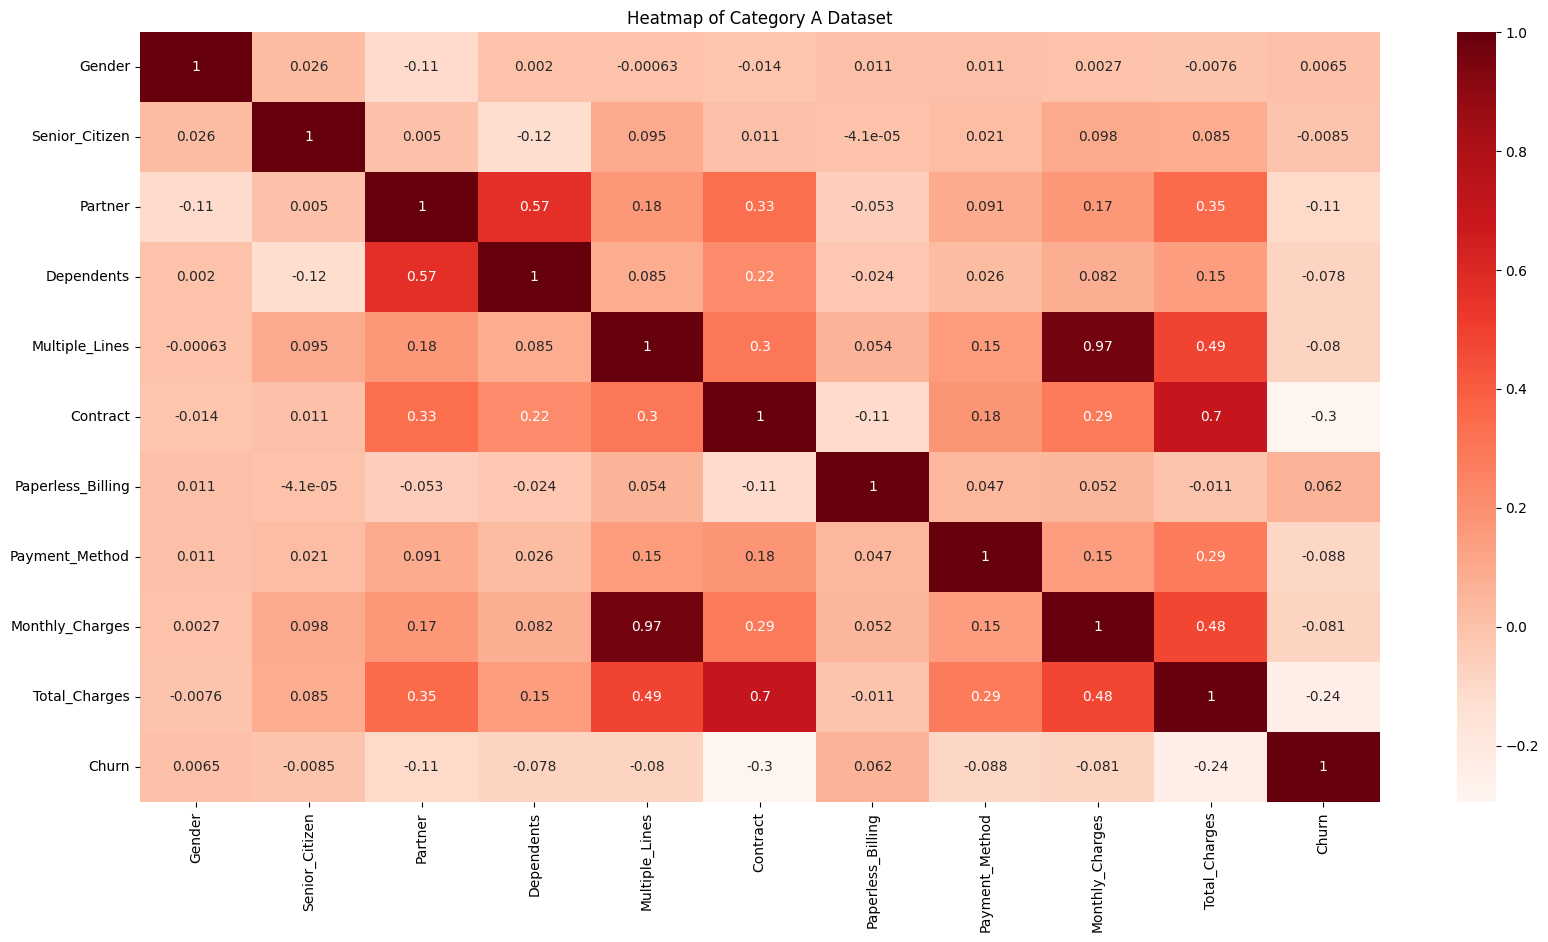

In [ ]:
plt.figure(figsize=(20,10))
cor = dfa.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.title('Heatmap of Category A Dataset')
plt.show()

Droping Columns which are related to internet.

In [ ]:
dfb = df[(df['Internet_Service']==1) & (df['Phone_Service']==0)].copy(deep=True)
dfb.drop(columns=['Phone_Service','Multiple_Lines', 'Internet_Service'],inplace = True)

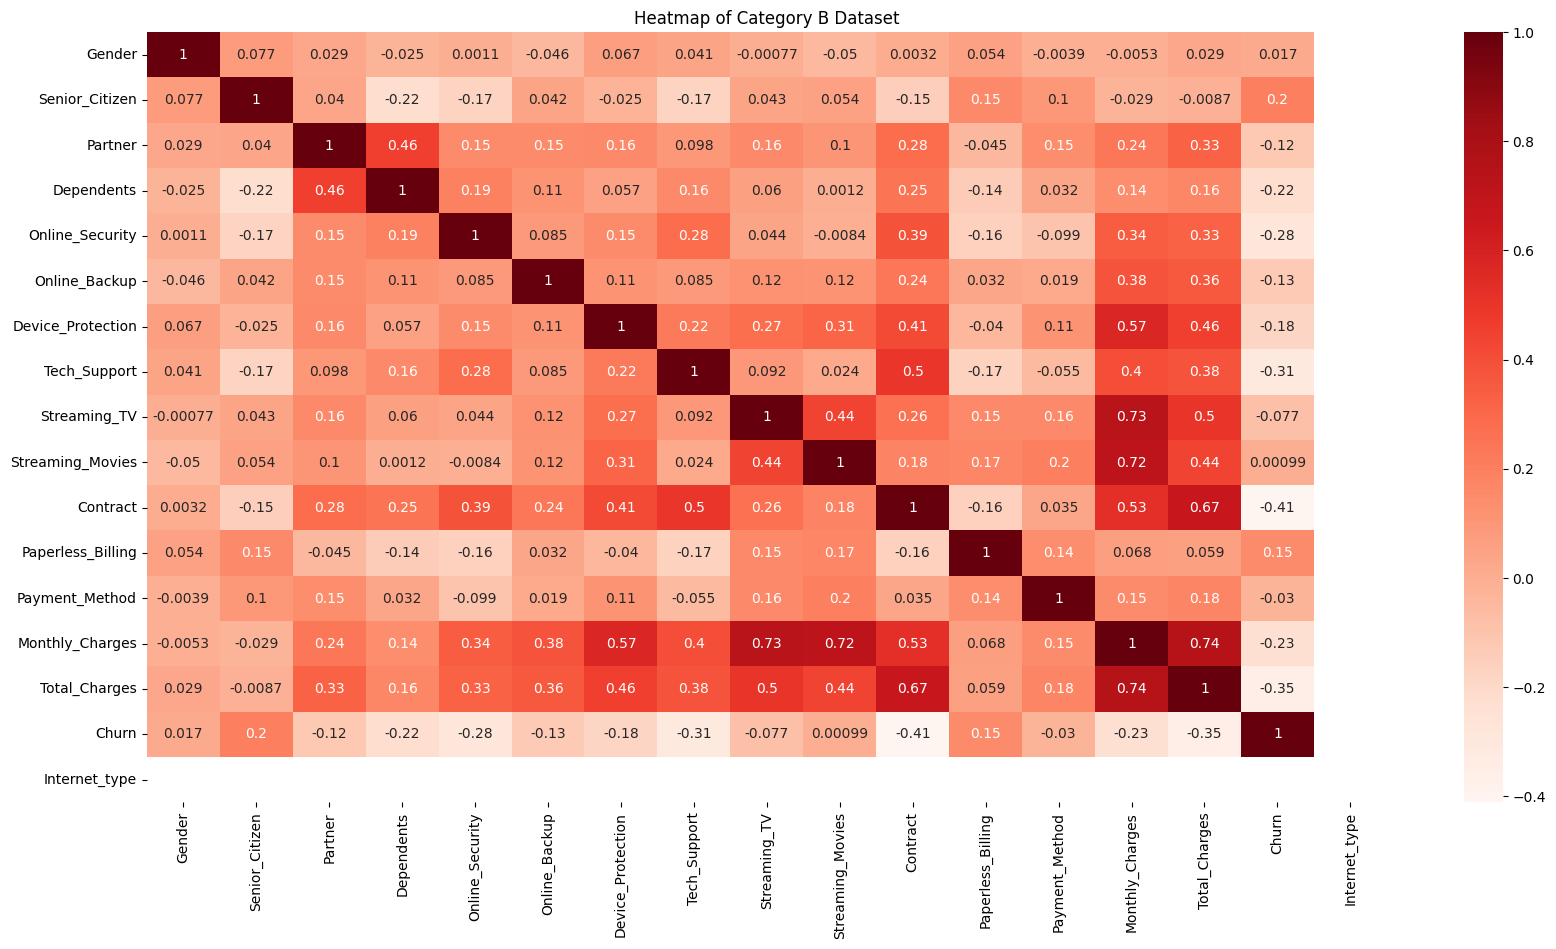

In [ ]:
plt.figure(figsize=(20,10))
cor = dfb.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.title('Heatmap of Category B Dataset')
plt.show()

In [ ]:
dfc = df[(df['Internet_Service']==1) & (df['Phone_Service']==1)].copy(deep=True)
dfc.drop(columns=['Phone_Service', 'Internet_Service'],inplace = True)

Here we have used 1 for Total Men Churn and 0 for Total Women Churn

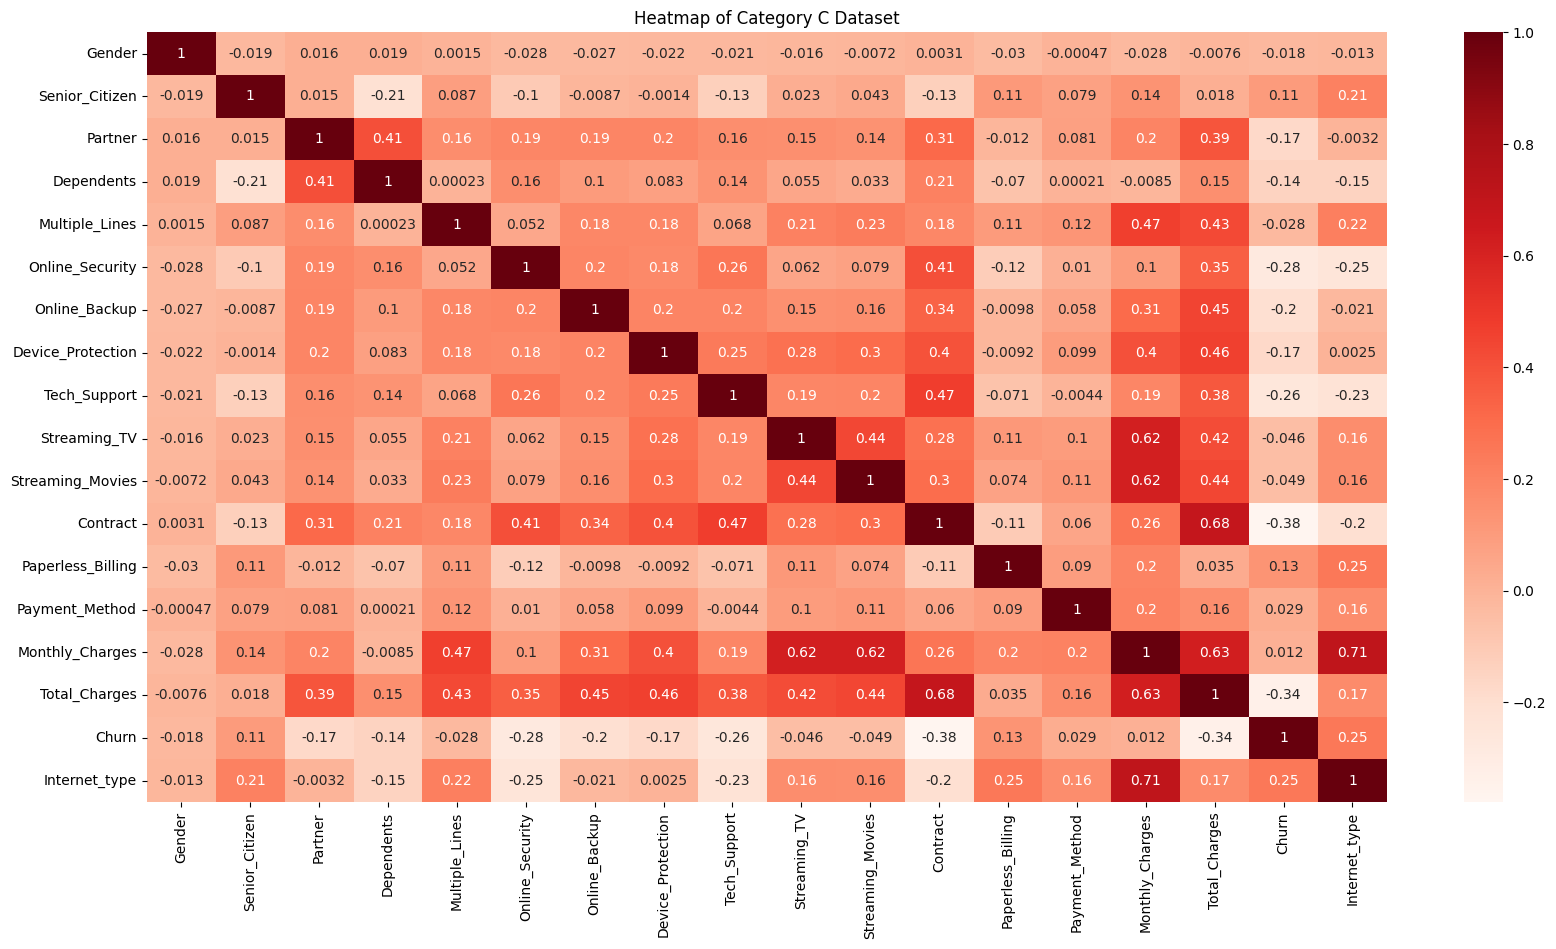

In [ ]:
plt.figure(figsize=(20,10))
cor = dfc.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.title('Heatmap of Category C Dataset')
plt.title
plt.show()

Here we have used 1 for Total Senior Citizen Churn and 0 for Total Non Senior Citizen Churn

churn percentage of Senior 41.11374407582938
churn percentage of Non-Senior 23.501577287066247


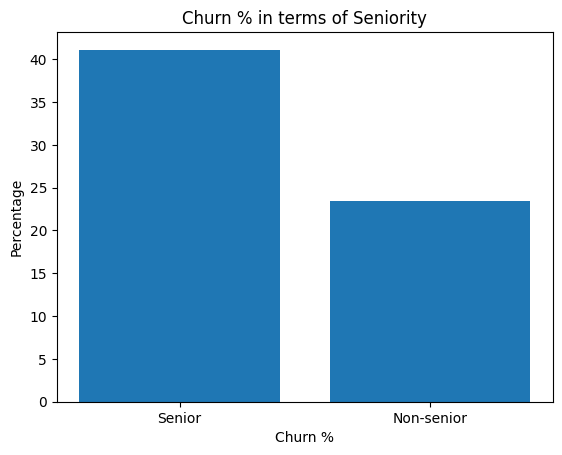

churn percentage of Senior 6.25
churn percentage of Non-Senior 7.616487455197133


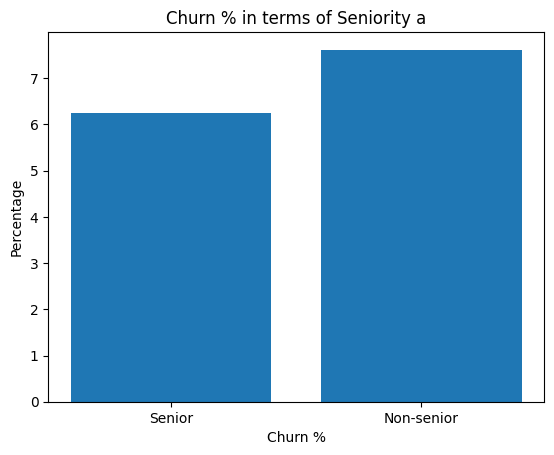

churn percentage of Senior 44.44444444444444
churn percentage of Non-Senior 21.261682242990652


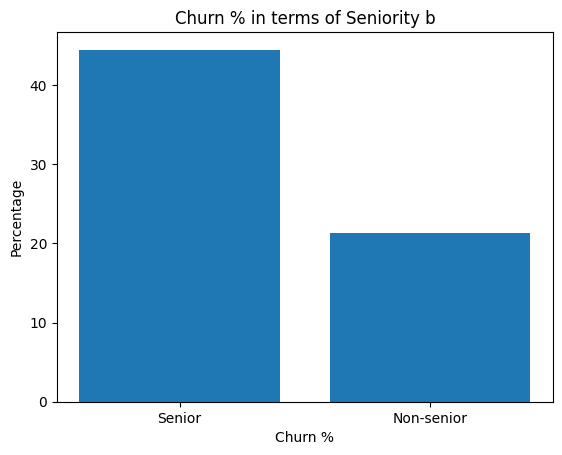

churn percentage of Senior 42.270861833105336
churn percentage of Non-Senior 29.958534899792678


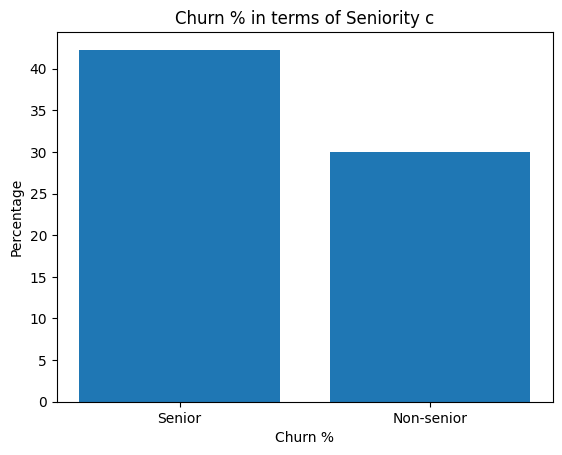

In [ ]:
total_senior_churn = (df[df['Senior_Citizen']==1]).Churn.sum()
total_senior = (df[df['Senior_Citizen']==1]).shape[0]
percentage_churn_senior = total_senior_churn/(total_senior)*100
print('churn percentage of Senior',percentage_churn_senior)

total_non_senior_churn = (df[df['Senior_Citizen']==0]).Churn.sum()
total_non_senior = (df[df['Senior_Citizen']==0]).shape[0]
percentage_churn_non_senior = total_non_senior_churn/(total_non_senior)*100
print('churn percentage of Non-Senior',percentage_churn_non_senior)

plt.bar(['Senior','Non-senior'],[percentage_churn_senior,percentage_churn_non_senior])
plt.xlabel('Churn %')
plt.ylabel('Percentage')
plt.title('Churn % in terms of Seniority')
plt.show()

total_senior_churn = (dfa[dfa['Senior_Citizen']==1]).Churn.sum()
total_senior = (dfa[dfa['Senior_Citizen']==1]).shape[0]
percentage_churn_senior = total_senior_churn/(total_senior)*100
print('churn percentage of Senior',percentage_churn_senior)

total_non_senior_churn = (dfa[dfa['Senior_Citizen']==0]).Churn.sum()
total_non_senior = (dfa[dfa['Senior_Citizen']==0]).shape[0]
percentage_churn_non_senior = total_non_senior_churn/(total_non_senior)*100
print('churn percentage of Non-Senior',percentage_churn_non_senior)

plt.bar(['Senior','Non-senior'],[percentage_churn_senior,percentage_churn_non_senior])
plt.xlabel('Churn %')
plt.ylabel('Percentage')
plt.title('Churn % in terms of Seniority a')
plt.show()


total_senior_churn = (dfb[dfb['Senior_Citizen']==1]).Churn.sum()
total_senior = (dfb[dfb['Senior_Citizen']==1]).shape[0]
percentage_churn_senior = total_senior_churn/(total_senior)*100
print('churn percentage of Senior',percentage_churn_senior)

total_non_senior_churn = (dfb[dfb['Senior_Citizen']==0]).Churn.sum()
total_non_senior = (dfb[dfb['Senior_Citizen']==0]).shape[0]
percentage_churn_non_senior = total_non_senior_churn/(total_non_senior)*100
print('churn percentage of Non-Senior',percentage_churn_non_senior)

plt.bar(['Senior','Non-senior'],[percentage_churn_senior,percentage_churn_non_senior])
plt.xlabel('Churn %')
plt.ylabel('Percentage')
plt.title('Churn % in terms of Seniority b')
plt.show()


total_senior_churn = (dfc[dfc['Senior_Citizen']==1]).Churn.sum()
total_senior = (dfc[dfc['Senior_Citizen']==1]).shape[0]
percentage_churn_senior = total_senior_churn/(total_senior)*100
print('churn percentage of Senior',percentage_churn_senior)

total_non_senior_churn = (dfc[dfc['Senior_Citizen']==0]).Churn.sum()
total_non_senior = (dfc[dfc['Senior_Citizen']==0]).shape[0]
percentage_churn_non_senior = total_non_senior_churn/(total_non_senior)*100
print('churn percentage of Non-Senior',percentage_churn_non_senior)

plt.bar(['Senior','Non-senior'],[percentage_churn_senior,percentage_churn_non_senior])
plt.xlabel('Churn %')
plt.ylabel('Percentage')
plt.title('Churn % in terms of Seniority c')
plt.show()

Here we have used 1 for Total Non-Dependents Churn and 0 for Total Dependents Churn

churn percentage Dependents 31.060606060606062
churn percentage of Dependents 15.258511979823455


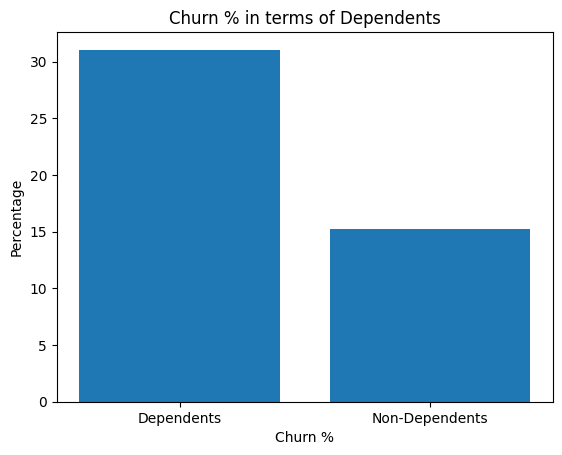

The percentage of Dependents with Positive churn is 31.060606060606062


In [ ]:
total_Dependents_churn = (df[df['Dependents']==0]).Churn.sum()
total_Dependents = (df[df['Dependents']==0]).shape[0]
percentage_churn_Dependents = total_Dependents_churn/(total_Dependents)*100
print('churn percentage Dependents',percentage_churn_Dependents)

total_nonDependents_churn = (df[df['Dependents']==1]).Churn.sum()
total_nonDependents = (df[df['Dependents']==1]).shape[0]
percentage_churn_nonDependents = total_nonDependents_churn/(total_nonDependents)*100
print('churn percentage of non - Dependents',percentage_churn_nonDependents)

plt.bar(['Dependents','Non-Dependents'],[percentage_churn_Dependents,percentage_churn_nonDependents])
plt.xlabel('Churn %')
plt.ylabel('Percentage')
plt.title('Churn % in terms of Dependents')
plt.show()

print(f'The percentage of Dependents with Positive churn is {percentage_churn_Dependents}')
# #pattern is same across all three

Here we have denoted month to month, one year and two year contract as 0, 1 and 2 respectively

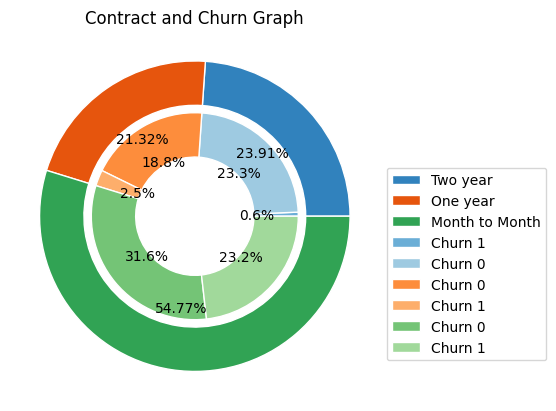

In [ ]:
df_contract2 = df[df['Contract']==2]
df_contract1 = df[df['Contract']==1]
df_contract0 = df[df['Contract']==0]


df_contract2_churn1 = df_contract2[df_contract2['Churn']==1].shape[0]
df_contract2_churn0 = df_contract2[df_contract2['Churn']==0].shape[0]

df_contract1_churn0 = df_contract1[df_contract1['Churn']==0].shape[0]
df_contract1_churn1 = df_contract1[df_contract1['Churn']==1].shape[0]

df_contract0_churn0 = df_contract0[df_contract0['Churn']==0].shape[0]
df_contract0_churn1 = df_contract0[df_contract0['Churn']==1].shape[0]

total = df.shape[0]

fig, ax = plt.subplots()
size = 0.3
vals = np.array([[df_contract2_churn1, df_contract2_churn0],[df_contract1_churn0 ,df_contract1_churn1],[df_contract0_churn0 ,df_contract0_churn1]])

cmap = plt.colormaps["tab20c"]
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap([1, 2, 5, 6, 9, 10])

ax.pie(vals.sum(axis=1), radius=1.05, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'),autopct='%.2f%%')

ax.pie(vals.flatten(), radius=1-size, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'),autopct='%.1f%%')

ax.set(aspect="equal", title='Contract and Churn Graph')
plt.legend(['Two year','One year','Month to Month','Churn 1', 'Churn 0','Churn 0','Churn 1','Churn 0','Churn 1'],bbox_to_anchor=(1,0.65), ncol=1)
plt.show()

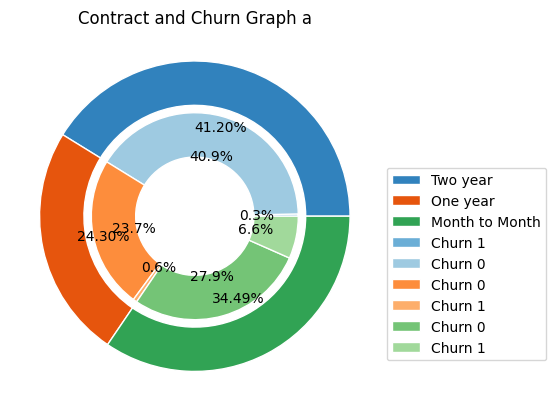

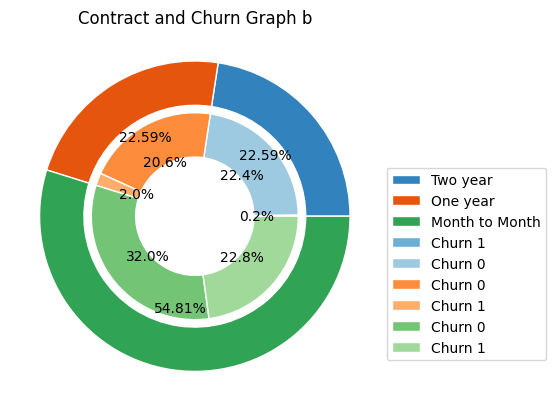

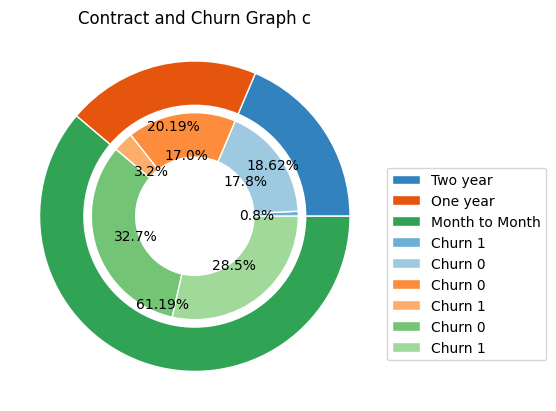

In [ ]:
dfa_contract2 = dfa[dfa['Contract']==2]
dfa_contract1 = dfa[dfa['Contract']==1]
dfa_contract0 = dfa[dfa['Contract']==0]


dfa_contract2_churn1 = dfa_contract2[dfa_contract2['Churn']==1].shape[0]
dfa_contract2_churn0 = dfa_contract2[dfa_contract2['Churn']==0].shape[0]

dfa_contract1_churn0 = dfa_contract1[dfa_contract1['Churn']==0].shape[0]
dfa_contract1_churn1 = dfa_contract1[dfa_contract1['Churn']==1].shape[0]

dfa_contract0_churn0 = dfa_contract0[dfa_contract0['Churn']==0].shape[0]
dfa_contract0_churn1 = dfa_contract0[dfa_contract0['Churn']==1].shape[0]

total = dfa.shape[0]

fig, ax = plt.subplots()
size = 0.3
vals = np.array([[dfa_contract2_churn1, dfa_contract2_churn0],[dfa_contract1_churn0 ,dfa_contract1_churn1],[dfa_contract0_churn0 ,dfa_contract0_churn1]])

cmap = plt.colormaps["tab20c"]
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap([1, 2, 5, 6, 9, 10])

ax.pie(vals.sum(axis=1), radius=1.05, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'),autopct='%.2f%%')

ax.pie(vals.flatten(), radius=1-size, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'),autopct='%.1f%%')

ax.set(aspect="equal", title='Contract and Churn Graph a')
plt.legend(['Two year','One year','Month to Month','Churn 1', 'Churn 0','Churn 0','Churn 1','Churn 0','Churn 1'],bbox_to_anchor=(1,0.65), ncol=1)
plt.show()

############################################################################################################################

dfb_contract2 = dfb[dfb['Contract']==2]
dfb_contract1 = dfb[dfb['Contract']==1]
dfb_contract0 = dfb[dfb['Contract']==0]

dfb_contract2_churn1 = dfb_contract2[dfb_contract2['Churn']==1].shape[0]
dfb_contract2_churn0 = dfb_contract2[dfb_contract2['Churn']==0].shape[0]

dfb_contract1_churn0 = dfb_contract1[dfb_contract1['Churn']==0].shape[0]
dfb_contract1_churn1 = dfb_contract1[dfb_contract1['Churn']==1].shape[0]

dfb_contract0_churn0 = dfb_contract0[dfb_contract0['Churn']==0].shape[0]
dfb_contract0_churn1 = dfb_contract0[dfb_contract0['Churn']==1].shape[0]

total = dfb.shape[0]

fig, ax = plt.subplots()
size = 0.3
vals = np.array([[dfb_contract2_churn1, dfb_contract2_churn0],[dfb_contract1_churn0 ,dfb_contract1_churn1],[dfb_contract0_churn0 ,dfb_contract0_churn1]])

cmap = plt.colormaps["tab20c"]
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap([1, 2, 5, 6, 9, 10])

ax.pie(vals.sum(axis=1), radius=1.05, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'),autopct='%.2f%%')

ax.pie(vals.flatten(), radius=1-size, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'),autopct='%.1f%%')

ax.set(aspect="equal", title='Contract and Churn Graph b')
plt.legend(['Two year','One year','Month to Month','Churn 1', 'Churn 0','Churn 0','Churn 1','Churn 0','Churn 1'],bbox_to_anchor=(1,0.65), ncol=1)
plt.show()

############################################################################################################################

dfc_contract2 = dfc[dfc['Contract']==2]
dfc_contract1 = dfc[dfc['Contract']==1]
dfc_contract0 = dfc[dfc['Contract']==0]


dfc_contract2_churn1 = dfc_contract2[dfc_contract2['Churn']==1].shape[0]
dfc_contract2_churn0 = dfc_contract2[dfc_contract2['Churn']==0].shape[0]

dfc_contract1_churn0 = dfc_contract1[dfc_contract1['Churn']==0].shape[0]
dfc_contract1_churn1 = dfc_contract1[dfc_contract1['Churn']==1].shape[0]

dfc_contract0_churn0 = dfc_contract0[dfc_contract0['Churn']==0].shape[0]
dfc_contract0_churn1 = dfc_contract0[dfc_contract0['Churn']==1].shape[0]

total = dfc.shape[0]

fig, ax = plt.subplots()
size = 0.3
vals = np.array([[dfc_contract2_churn1, dfc_contract2_churn0],[dfc_contract1_churn0 ,dfc_contract1_churn1],[dfc_contract0_churn0 ,dfc_contract0_churn1]])

cmap = plt.colormaps["tab20c"]
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap([1, 2, 5, 6, 9, 10])

ax.pie(vals.sum(axis=1), radius=1.05, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'),autopct='%.2f%%')

ax.pie(vals.flatten(), radius=1-size, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'),autopct='%.1f%%')

ax.set(aspect="equal", title='Contract and Churn Graph c')
plt.legend(['Two year','One year','Month to Month','Churn 1', 'Churn 0','Churn 0','Churn 1','Churn 0','Churn 1'],bbox_to_anchor=(1,0.65), ncol=1)
plt.show()


ye wala ni aya smjh ye dekh lio

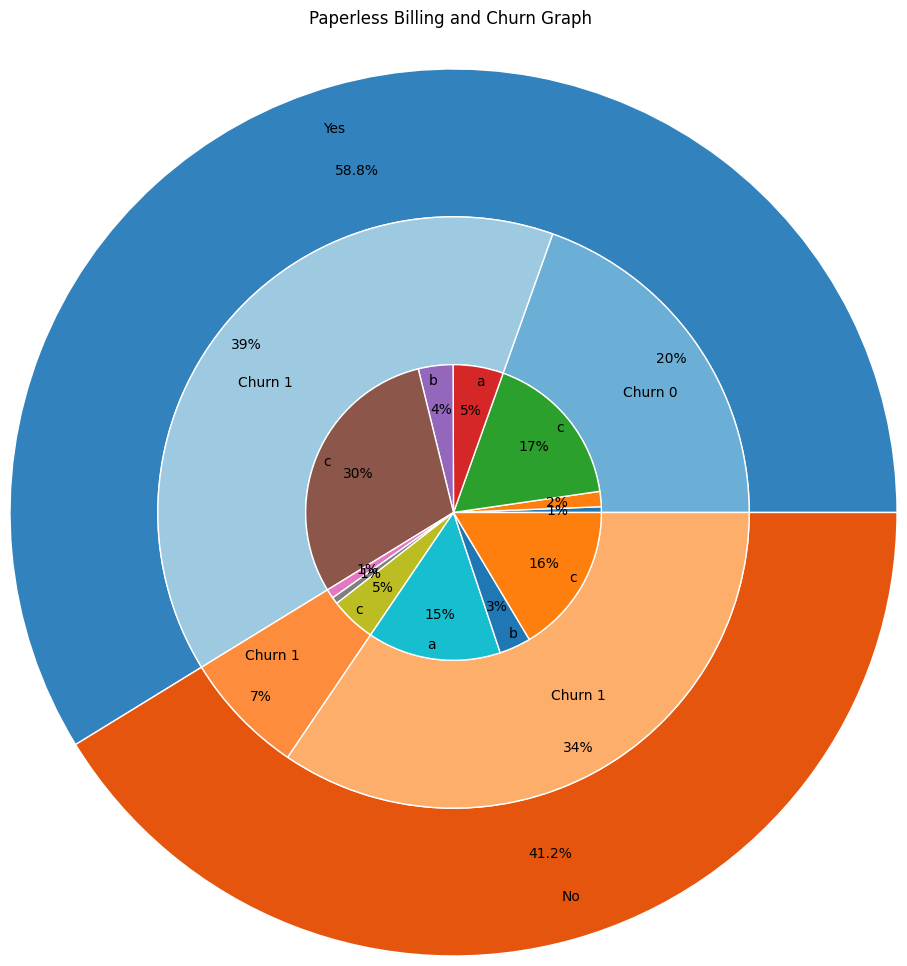

In [ ]:
yes_paperless_1_a = len(dfa[(dfa['Paperless_Billing']==1) & (dfa['Churn']==1)])
yes_paperless_1_b = len(dfb[(dfb['Paperless_Billing']==1) & (dfb['Churn']==1)])
yes_paperless_1_c = len(dfc[(dfc['Paperless_Billing']==1) & (dfc['Churn']==1)])

yes_paperless_0_a = len(dfa[(dfa['Paperless_Billing']==1) & (dfa['Churn']==0)])
yes_paperless_0_b = len(dfb[(dfb['Paperless_Billing']==1) & (dfb['Churn']==0)])
yes_paperless_0_c = len(dfc[(dfc['Paperless_Billing']==1) & (dfc['Churn']==0)])

no_paperless_1_a = len(dfa[(dfa['Paperless_Billing']==0) & (dfa['Churn']==1)])
no_paperless_1_b = len(dfb[(dfb['Paperless_Billing']==0) & (dfb['Churn']==1)])
no_paperless_1_c = len(dfc[(dfc['Paperless_Billing']==0) & (dfc['Churn']==1)])

no_paperless_0_a = len(dfa[(dfa['Paperless_Billing']==0) & (dfa['Churn']==0)])
no_paperless_0_b = len(dfb[(dfb['Paperless_Billing']==0) & (dfb['Churn']==0)])
no_paperless_0_c = len(dfc[(dfc['Paperless_Billing']==0) & (dfc['Churn']==0)])


circle1 = [ yes_paperless_1_a + yes_paperless_1_b + yes_paperless_1_c + yes_paperless_0_a +yes_paperless_0_b + yes_paperless_0_c ,
          no_paperless_1_a +  no_paperless_1_b +  no_paperless_1_c +  no_paperless_0_a + no_paperless_0_b +  no_paperless_0_c ]

circle2 = [yes_paperless_1_a + yes_paperless_1_b + yes_paperless_1_c,
           yes_paperless_0_a + yes_paperless_0_b + yes_paperless_0_c,
           no_paperless_1_a + no_paperless_1_b + no_paperless_1_c,
           no_paperless_0_a + no_paperless_0_b + no_paperless_0_c,]

circle3 = [yes_paperless_1_a , yes_paperless_1_b , yes_paperless_1_c,
           yes_paperless_0_a , yes_paperless_0_b , yes_paperless_0_c,
           no_paperless_1_a  , no_paperless_1_b  , no_paperless_1_c,
           no_paperless_0_a  , no_paperless_0_b  , no_paperless_0_c,]




fig, ax = plt.subplots()
size = 1

cmap = plt.colormaps["tab20c"]
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap([1, 2, 5,6])



ax.pie(circle1, radius=3, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'),autopct='%.1f%%',pctdistance=0.8 ,
       labels= ['Yes', 'No'],labeldistance=0.9)

ax.pie(circle2, radius=3-size, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'),autopct='%.0f%%',pctdistance=0.9 ,
       labels = ['Churn 0 ', 'Churn 1','Churn 1 ', 'Churn 1'],labeldistance=0.7)

ax.pie(circle3, radius=3-size*2 ,
       wedgeprops=dict(width=size, edgecolor='w'),autopct='%.0f%%',pctdistance=0.7,
       labels=['','','c','a','b','c','','','c','a','b','c'] ,labeldistance=0.9
       )


ax.set(aspect="equal")
ax.set_title('Paperless Billing and Churn Graph ',x=0.5,y=1.8)
#plt.legend(['Two year','One year','Month to Month','Churn 1', 'Churn 0','Churn 0','Churn 1','Churn 0','Churn 1'],bbox_to_anchor=(1,0.65), ncol=1)
plt.show()

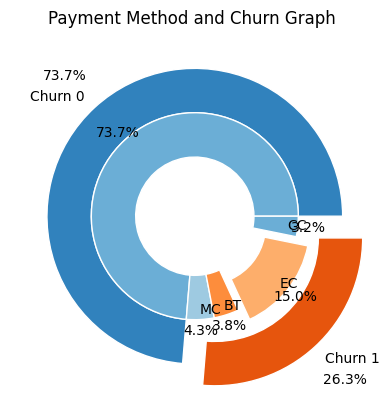

In [ ]:
payment_0_0 = len(df[(df['Payment_Method']==0) & (df['Churn']==0)])
payment_1_0 = len(df[(df['Payment_Method']==1) & (df['Churn']==0)])
payment_2_0 = len(df[(df['Payment_Method']==2) & (df['Churn']==0)])
payment_3_0 = len(df[(df['Payment_Method']==3) & (df['Churn']==0)])

payment_0_1 = len(df[(df['Payment_Method']==0) & (df['Churn']==1)])
payment_1_1 = len(df[(df['Payment_Method']==1) & (df['Churn']==1)])
payment_2_1 = len(df[(df['Payment_Method']==2) & (df['Churn']==1)])
payment_3_1 = len(df[(df['Payment_Method']==3) & (df['Churn']==1)])

ig, ax = plt.subplots()
size = 0.3

cmap = plt.colormaps["tab20c"]
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap([1, 2, 5,6])

circle1 = [payment_0_0 + payment_1_0 + payment_2_0 + payment_3_0 ,
           payment_0_1 + payment_1_1 + payment_2_1 + payment_3_1]

circle2 = [payment_0_0 + payment_1_0 + payment_2_0 + payment_3_0 ,
           payment_0_1 , payment_1_1 , payment_2_1 , payment_3_1]

explode = (0,0,0,0.1,0)
explode_out = (0,0.2)

ax.pie(circle1, radius=1, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'),autopct='%.1f%%',pctdistance=1.3 ,
       labels= ['Churn 0', 'Churn 1'],labeldistance=1.1 , explode = explode_out)

ax.pie(circle2, radius=1-size, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'),autopct='%.1f%%',pctdistance=1.1,
       labels=['','MC','BT','EC','CC'] , labeldistance=0.9 , explode = explode
       )

ax.set(aspect="equal")
ax.set_title('Payment Method and Churn Graph ',x=0.5,y=1)
#plt.legend(['Two year','One year','Month to Month','Churn 1', 'Churn 0','Churn 0','Churn 1','Churn 0','Churn 1'],bbox_to_anchor=(1,0.65), ncol=1)
plt.show()

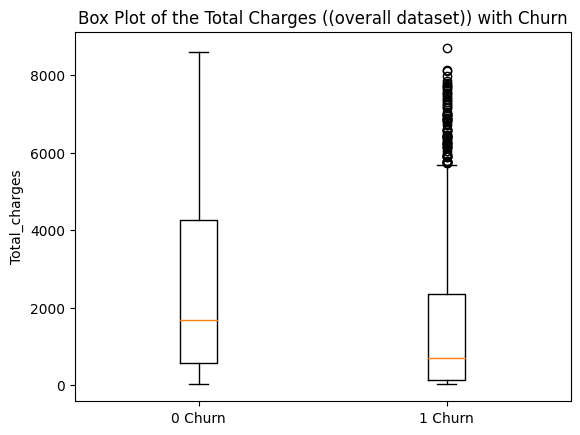

The Median of the Total Charges (overall dataset) with Churn 0 is 1679.45
The Median of the Total Charges (overall dataset) with Churn 1 is 705.075


In [ ]:
df_totalcharge_0 =df[df['Churn']==0].Total_Charges
df_totalcharge_1 =df[df['Churn']==1].Total_Charges

plt.boxplot([df_totalcharge_0,df_totalcharge_1])
plt.xticks([1,2],["0 Churn","1 Churn"])
plt.ylabel('Total_charges')
plt.title("Box Plot of the Total Charges ((overall dataset)) with Churn")
plt.show()


print(f'The Median of the Total Charges (overall dataset) with Churn 0 is {df_totalcharge_0.median(axis =0)}')
print(f'The Median of the Total Charges (overall dataset) with Churn 1 is {df_totalcharge_1.median(axis =0)}')



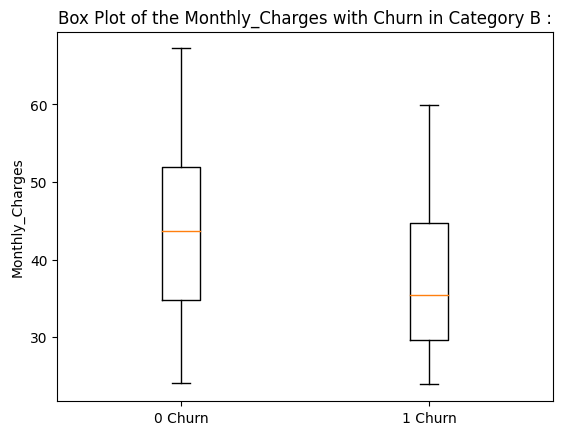

The Median of the Monthly_Charges in category B with Churn 0 is 43.650000000000006
The Median of Monthly_Charges in category B with Churn 1 is 35.45


In [ ]:
dfa_Monthly_Charges_0 =dfb[dfb['Churn']==0].Monthly_Charges
dfa_Monthly_Charges_1 =dfb[dfb['Churn']==1].Monthly_Charges

plt.boxplot([dfa_Monthly_Charges_0,dfa_Monthly_Charges_1])
plt.xticks([1,2],["0 Churn","1 Churn"])
plt.ylabel('Monthly_Charges')
plt.title("Box Plot of the Monthly_Charges with Churn in Category B :")
plt.show()


print(f'The Median of the Monthly_Charges in category B with Churn 0 is {dfa_Monthly_Charges_0.median(axis =0)}')
print(f'The Median of Monthly_Charges in category B with Churn 1 is {dfa_Monthly_Charges_1.median(axis =0)}')

<ipython-input-47-4d4afae721de>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  online_security_1_1_b = len(dfb[(df['Churn']==1) & (df['Online_Security']==1)])
<ipython-input-47-4d4afae721de>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  online_security_1_0_b = len(dfb[(df['Churn']==0) & (df['Online_Security']==1)])
<ipython-input-47-4d4afae721de>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  online_security_0_1_b = len(dfb[(df['Churn']==1) & (df['Online_Security']==0)])
<ipython-input-47-4d4afae721de>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  online_security_0_0_b = len(dfb[(df['Churn']==0) & (df['Online_Security']==0)])


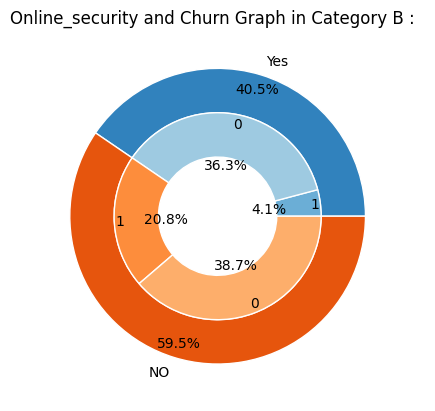

In [ ]:
online_security_1_1_b = len(dfb[(df['Churn']==1) & (df['Online_Security']==1)])
online_security_1_0_b = len(dfb[(df['Churn']==0) & (df['Online_Security']==1)])

online_security_0_1_b = len(dfb[(df['Churn']==1) & (df['Online_Security']==0)])
online_security_0_0_b = len(dfb[(df['Churn']==0) & (df['Online_Security']==0)])

ig, ax = plt.subplots()
size = 0.3

cmap = plt.colormaps["tab20c"]
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap([1, 2, 5,6])

circle1 = [online_security_1_1_b + online_security_1_0_b , online_security_0_1_b + online_security_0_0_b]
circle2 = [online_security_1_1_b , online_security_1_0_b , online_security_0_1_b , online_security_0_0_b]

ax.pie(circle1, radius=1, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'),autopct='%.1f%%',pctdistance=0.9,
       labels= ['Yes', 'NO'],labeldistance=1.1 ,)

ax.pie(circle2, radius=1-size, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'),autopct='%.1f%%',pctdistance=0.5,
       labels=['1','0','1','0'] , labeldistance=0.9)

ax.set(aspect="equal")
ax.set_title('Online_security and Churn Graph in Category B :  ',x=0.5,y=1)
#plt.legend(['Two year','One year','Month to Month','Churn 1', 'Churn 0','Churn 0','Churn 1','Churn 0','Churn 1'],bbox_to_anchor=(1,0.65), ncol=1)
plt.show()

<ipython-input-48-b83745044a7a>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  online_security_1_1_c = len(dfc[(df['Churn']==1) & (df['Online_Security']==1)])
<ipython-input-48-b83745044a7a>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  online_security_1_0_c = len(dfc[(df['Churn']==0) & (df['Online_Security']==1)])
<ipython-input-48-b83745044a7a>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  online_security_0_1_c = len(dfc[(df['Churn']==1) & (df['Online_Security']==0)])
<ipython-input-48-b83745044a7a>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  online_security_0_0_c = len(dfc[(df['Churn']==0) & (df['Online_Security']==0)])


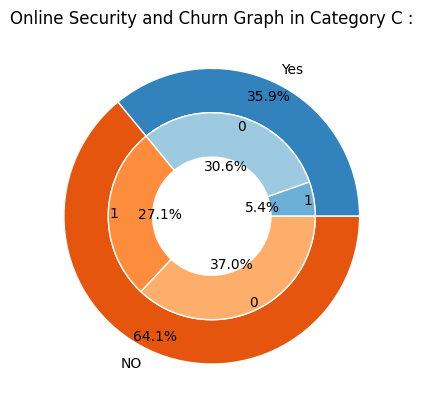

In [ ]:
online_security_1_1_c = len(dfc[(df['Churn']==1) & (df['Online_Security']==1)])
online_security_1_0_c = len(dfc[(df['Churn']==0) & (df['Online_Security']==1)])

online_security_0_1_c = len(dfc[(df['Churn']==1) & (df['Online_Security']==0)])
online_security_0_0_c = len(dfc[(df['Churn']==0) & (df['Online_Security']==0)])

ig, ax = plt.subplots()
size = 0.3

cmap = plt.colormaps["tab20c"]
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap([1, 2, 5,6])

circle1 = [online_security_1_1_c + online_security_1_0_c , online_security_0_1_c + online_security_0_0_c]
circle2 = [online_security_1_1_c , online_security_1_0_c , online_security_0_1_c , online_security_0_0_c]

ax.pie(circle1, radius=1, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'),autopct='%.1f%%',pctdistance=0.9,
       labels= ['Yes', 'NO'],labeldistance=1.1 ,)

ax.pie(circle2, radius=1-size, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'),autopct='%.1f%%',pctdistance=0.5,
       labels=['1','0','1','0'] , labeldistance=0.9)

ax.set(aspect="equal")
ax.set_title('Online Security and Churn Graph in Category C :',x=0.5,y=1)
#plt.legend(['Two year','One year','Month to Month','Churn 1', 'Churn 0','Churn 0','Churn 1','Churn 0','Churn 1'],bbox_to_anchor=(1,0.65), ncol=1)
plt.show()

Here we have denoted users with online backup and without online backup as 1 and 0 respectively

<ipython-input-49-4b9e7828f96e>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  online_backup_1_1_b = len(dfb[(df['Churn']==1) & (df['Online_Backup']==1)])
<ipython-input-49-4b9e7828f96e>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  online_backup_1_0_b = len(dfb[(df['Churn']==0) & (df['Online_Backup']==1)])
<ipython-input-49-4b9e7828f96e>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  online_backup_0_1_b = len(dfb[(df['Churn']==1) & (df['Online_Backup']==0)])
<ipython-input-49-4b9e7828f96e>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  online_backup_0_0_b = len(dfb[(df['Churn']==0) & (df['Online_Backup']==0)])


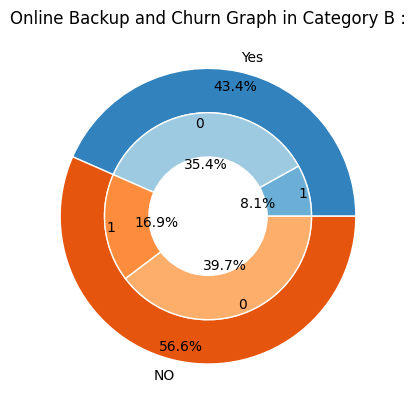

<ipython-input-49-4b9e7828f96e>:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  online_backup_1_1_c = len(dfc[(df['Churn']==1) & (df['Online_Backup']==1)])
<ipython-input-49-4b9e7828f96e>:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  online_backup_1_0_c = len(dfc[(df['Churn']==0) & (df['Online_Backup']==1)])
<ipython-input-49-4b9e7828f96e>:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  online_backup_0_1_c = len(dfc[(df['Churn']==1) & (df['Online_Backup']==0)])
<ipython-input-49-4b9e7828f96e>:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  online_backup_0_0_c = len(dfc[(df['Churn']==0) & (df['Online_Backup']==0)])


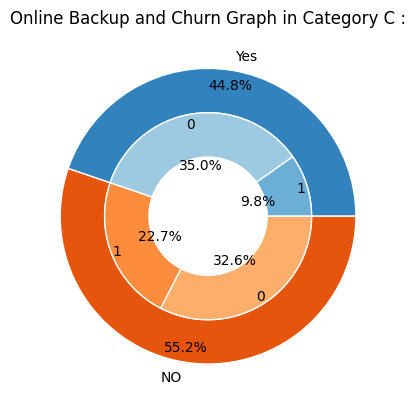

In [ ]:
online_backup_1_1_b = len(dfb[(df['Churn']==1) & (df['Online_Backup']==1)])
online_backup_1_0_b = len(dfb[(df['Churn']==0) & (df['Online_Backup']==1)])

online_backup_0_1_b = len(dfb[(df['Churn']==1) & (df['Online_Backup']==0)])
online_backup_0_0_b = len(dfb[(df['Churn']==0) & (df['Online_Backup']==0)])

ig, ax = plt.subplots()
size = 0.3

cmap = plt.colormaps["tab20c"]
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap([1, 2, 5,6])

circle1 = [online_backup_1_1_b + online_backup_1_0_b , online_backup_0_1_b + online_backup_0_0_b]
circle2 = [online_backup_1_1_b , online_backup_1_0_b , online_backup_0_1_b , online_backup_0_0_b]

ax.pie(circle1, radius=1, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'),autopct='%.1f%%',pctdistance=0.9,
       labels= ['Yes', 'NO'],labeldistance=1.1 ,)

ax.pie(circle2, radius=1-size, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'),autopct='%.1f%%',pctdistance=0.5,
       labels=['1','0','1','0'] , labeldistance=0.9)

ax.set(aspect="equal")
ax.set_title('Online Backup and Churn Graph in Category B :',x=0.5,y=1)
#plt.legend(['Two year','One year','Month to Month','Churn 1', 'Churn 0','Churn 0','Churn 1','Churn 0','Churn 1'],bbox_to_anchor=(1,0.65), ncol=1)
plt.show()


online_backup_1_1_c = len(dfc[(df['Churn']==1) & (df['Online_Backup']==1)])
online_backup_1_0_c = len(dfc[(df['Churn']==0) & (df['Online_Backup']==1)])

online_backup_0_1_c = len(dfc[(df['Churn']==1) & (df['Online_Backup']==0)])
online_backup_0_0_c = len(dfc[(df['Churn']==0) & (df['Online_Backup']==0)])

ig, ax = plt.subplots()
size = 0.3

cmap = plt.colormaps["tab20c"]
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap([1, 2, 5,6])

circle1 = [online_backup_1_1_c + online_backup_1_0_c , online_backup_0_1_c + online_backup_0_0_c]
circle2 = [online_backup_1_1_c , online_backup_1_0_c , online_backup_0_1_c , online_backup_0_0_c]

ax.pie(circle1, radius=1, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'),autopct='%.1f%%',pctdistance=0.9,
       labels= ['Yes', 'NO'],labeldistance=1.1 ,)

ax.pie(circle2, radius=1-size, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'),autopct='%.1f%%',pctdistance=0.5,
       labels=['1','0','1','0'] , labeldistance=0.9)

ax.set(aspect="equal")
ax.set_title('Online Backup and Churn Graph in Category C :',x=0.5,y=1)
#plt.legend(['Two year','One year','Month to Month','Churn 1', 'Churn 0','Churn 0','Churn 1','Churn 0','Churn 1'],bbox_to_anchor=(1,0.65), ncol=1)
plt.show()

<ipython-input-50-0c04a7ecf2d2>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Device_Protection_1_1_b = len(dfb[(df['Churn']==1) & (df['Device_Protection']==1)])
<ipython-input-50-0c04a7ecf2d2>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Device_Protection_1_0_b = len(dfb[(df['Churn']==0) & (df['Device_Protection']==1)])
<ipython-input-50-0c04a7ecf2d2>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Device_Protection_0_1_b = len(dfb[(df['Churn']==1) & (df['Device_Protection']==0)])
<ipython-input-50-0c04a7ecf2d2>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Device_Protection_0_0_b = len(dfb[(df['Churn']==0) & (df['Device_Protection']==0)])


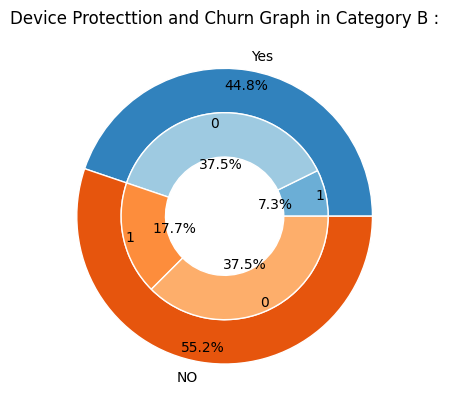

<ipython-input-50-0c04a7ecf2d2>:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Device_Protection_1_1_c = len(dfc[(df['Churn']==1) & (df['Device_Protection']==1)])
<ipython-input-50-0c04a7ecf2d2>:33: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Device_Protection_1_0_c = len(dfc[(df['Churn']==0) & (df['Device_Protection']==1)])
<ipython-input-50-0c04a7ecf2d2>:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Device_Protection_0_1_c = len(dfc[(df['Churn']==1) & (df['Device_Protection']==0)])
<ipython-input-50-0c04a7ecf2d2>:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Device_Protection_0_0_c = len(dfc[(df['Churn']==0) & (df['Device_Protection']==0)])


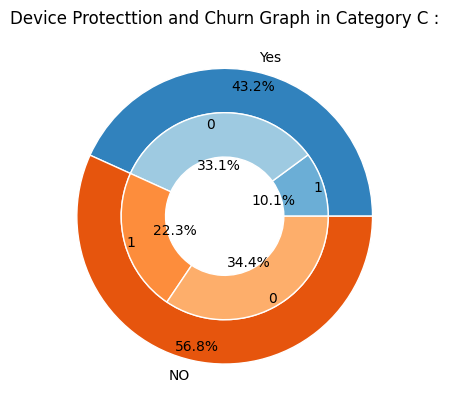

In [ ]:
Device_Protection_1_1_b = len(dfb[(df['Churn']==1) & (df['Device_Protection']==1)])
Device_Protection_1_0_b = len(dfb[(df['Churn']==0) & (df['Device_Protection']==1)])

Device_Protection_0_1_b = len(dfb[(df['Churn']==1) & (df['Device_Protection']==0)])
Device_Protection_0_0_b = len(dfb[(df['Churn']==0) & (df['Device_Protection']==0)])

ig, ax = plt.subplots()
size = 0.3

cmap = plt.colormaps["tab20c"]
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap([1, 2, 5,6])

circle1 = [Device_Protection_1_1_b + Device_Protection_1_0_b , Device_Protection_0_1_b + Device_Protection_0_0_b]
circle2 = [Device_Protection_1_1_b , Device_Protection_1_0_b , Device_Protection_0_1_b , Device_Protection_0_0_b]

ax.pie(circle1, radius=1, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'),autopct='%.1f%%',pctdistance=0.9,
       labels= ['Yes', 'NO'],labeldistance=1.1 )

ax.pie(circle2, radius=1-size, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'),autopct='%.1f%%',pctdistance=0.5,
       labels=['1','0','1','0'] , labeldistance=0.9)

ax.set(aspect="equal")
ax.set_title('Device Protecttion and Churn Graph in Category B :',x=0.5,y=1)
#plt.legend(['Two year','One year','Month to Month','Churn 1', 'Churn 0','Churn 0','Churn 1','Churn 0','Churn 1'],bbox_to_anchor=(1,0.65), ncol=1)
plt.show()

##############################################################################################################################################

Device_Protection_1_1_c = len(dfc[(df['Churn']==1) & (df['Device_Protection']==1)])
Device_Protection_1_0_c = len(dfc[(df['Churn']==0) & (df['Device_Protection']==1)])

Device_Protection_0_1_c = len(dfc[(df['Churn']==1) & (df['Device_Protection']==0)])
Device_Protection_0_0_c = len(dfc[(df['Churn']==0) & (df['Device_Protection']==0)])

ig, ax = plt.subplots()
size = 0.3

cmap = plt.colormaps["tab20c"]
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap([1, 2, 5,6])

circle1 = [Device_Protection_1_1_c + Device_Protection_1_0_c , Device_Protection_0_1_c + Device_Protection_0_0_c]
circle2 = [Device_Protection_1_1_c , Device_Protection_1_0_c , Device_Protection_0_1_c , Device_Protection_0_0_c]

ax.pie(circle1, radius=1, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'),autopct='%.1f%%',pctdistance=0.9,
       labels= ['Yes', 'NO'],labeldistance=1.1 ,)

ax.pie(circle2, radius=1-size, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'),autopct='%.1f%%',pctdistance=0.5,
       labels=['1','0','1','0'] , labeldistance=0.9)

ax.set(aspect="equal")
ax.set_title('Device Protecttion and Churn Graph in Category C :',x=0.5,y=1)
#plt.legend(['Two year','One year','Month to Month','Churn 1', 'Churn 0','Churn 0','Churn 1','Churn 0','Churn 1'],bbox_to_anchor=(1,0.65), ncol=1)
plt.show()

<ipython-input-51-3dee073559ae>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Tech_Support_1_1_b = len(dfb[(df['Churn']==1) & (df['Tech_Support']==1)])
<ipython-input-51-3dee073559ae>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Tech_Support_1_0_b = len(dfb[(df['Churn']==0) & (df['Tech_Support']==1)])
<ipython-input-51-3dee073559ae>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Tech_Support_0_1_b = len(dfb[(df['Churn']==1) & (df['Tech_Support']==0)])
<ipython-input-51-3dee073559ae>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Tech_Support_0_0_b = len(dfb[(df['Churn']==0) & (df['Tech_Support']==0)])


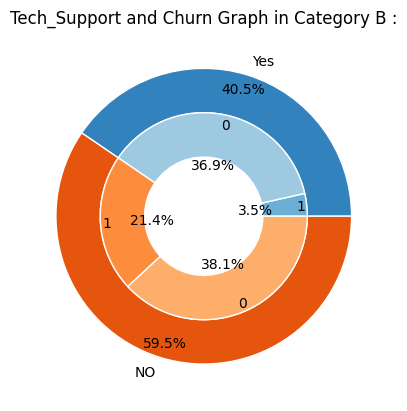

<ipython-input-51-3dee073559ae>:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Tech_Support_1_1_c = len(dfc[(df['Churn']==1) & (df['Tech_Support']==1)])
<ipython-input-51-3dee073559ae>:33: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Tech_Support_1_0_c = len(dfc[(df['Churn']==0) & (df['Tech_Support']==1)])
<ipython-input-51-3dee073559ae>:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Tech_Support_0_1_c = len(dfc[(df['Churn']==1) & (df['Tech_Support']==0)])
<ipython-input-51-3dee073559ae>:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Tech_Support_0_0_c = len(dfc[(df['Churn']==0) & (df['Tech_Support']==0)])


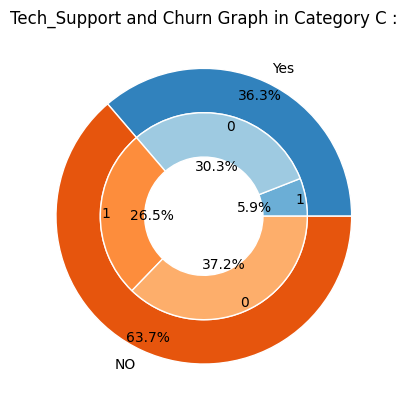

In [ ]:
Tech_Support_1_1_b = len(dfb[(df['Churn']==1) & (df['Tech_Support']==1)])
Tech_Support_1_0_b = len(dfb[(df['Churn']==0) & (df['Tech_Support']==1)])

Tech_Support_0_1_b = len(dfb[(df['Churn']==1) & (df['Tech_Support']==0)])
Tech_Support_0_0_b = len(dfb[(df['Churn']==0) & (df['Tech_Support']==0)])

ig, ax = plt.subplots()
size = 0.3

cmap = plt.colormaps["tab20c"]
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap([1, 2, 5,6])

circle1 = [Tech_Support_1_1_b + Tech_Support_1_0_b , Tech_Support_0_1_b + Tech_Support_0_0_b]
circle2 = [Tech_Support_1_1_b , Tech_Support_1_0_b , Tech_Support_0_1_b , Tech_Support_0_0_b]

ax.pie(circle1, radius=1, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'),autopct='%.1f%%',pctdistance=0.9,
       labels= ['Yes', 'NO'],labeldistance=1.1 )

ax.pie(circle2, radius=1-size, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'),autopct='%.1f%%',pctdistance=0.5,
       labels=['1','0','1','0'] , labeldistance=0.9)

ax.set(aspect="equal")
ax.set_title('Tech_Support and Churn Graph in Category B :',x=0.5,y=1)
#plt.legend(['Two year','One year','Month to Month','Churn 1', 'Churn 0','Churn 0','Churn 1','Churn 0','Churn 1'],bbox_to_anchor=(1,0.65), ncol=1)
plt.show()

##############################################################################################################################################

Tech_Support_1_1_c = len(dfc[(df['Churn']==1) & (df['Tech_Support']==1)])
Tech_Support_1_0_c = len(dfc[(df['Churn']==0) & (df['Tech_Support']==1)])

Tech_Support_0_1_c = len(dfc[(df['Churn']==1) & (df['Tech_Support']==0)])
Tech_Support_0_0_c = len(dfc[(df['Churn']==0) & (df['Tech_Support']==0)])

ig, ax = plt.subplots()
size = 0.3

cmap = plt.colormaps["tab20c"]
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap([1, 2, 5,6])

circle1 = [Tech_Support_1_1_c + Tech_Support_1_0_c , Tech_Support_0_1_c + Tech_Support_0_0_c]
circle2 = [Tech_Support_1_1_c , Tech_Support_1_0_c , Tech_Support_0_1_c , Tech_Support_0_0_c]

ax.pie(circle1, radius=1, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'),autopct='%.1f%%',pctdistance=0.9,
       labels= ['Yes', 'NO'],labeldistance=1.1 ,)

ax.pie(circle2, radius=1-size, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'),autopct='%.1f%%',pctdistance=0.5,
       labels=['1','0','1','0'] , labeldistance=0.9)

ax.set(aspect="equal")
ax.set_title('Tech_Support and Churn Graph in Category C :',x=0.5,y=1)
#plt.legend(['Two year','One year','Month to Month','Churn 1', 'Churn 0','Churn 0','Churn 1','Churn 0','Churn 1'],bbox_to_anchor=(1,0.65), ncol=1)
plt.show()

<ipython-input-52-d4ed0feaf7fb>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Internet_type_1_1_b = len(dfb[(df['Churn']==1) & (df['Internet_type']==1)])
<ipython-input-52-d4ed0feaf7fb>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Internet_type_1_0_b = len(dfb[(df['Churn']==0) & (df['Internet_type']==1)])
<ipython-input-52-d4ed0feaf7fb>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Internet_type_0_1_b = len(dfb[(df['Churn']==1) & (df['Internet_type']==0)])
<ipython-input-52-d4ed0feaf7fb>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Internet_type_0_0_b = len(dfb[(df['Churn']==0) & (df['Internet_type']==0)])


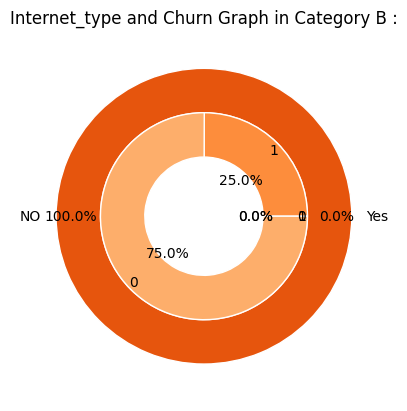

<ipython-input-52-d4ed0feaf7fb>:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Internet_type_1_1_c = len(dfc[(df['Churn']==1) & (df['Internet_type']==1)])
<ipython-input-52-d4ed0feaf7fb>:33: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Internet_type_1_0_c = len(dfc[(df['Churn']==0) & (df['Internet_type']==1)])
<ipython-input-52-d4ed0feaf7fb>:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Internet_type_0_1_c = len(dfc[(df['Churn']==1) & (df['Internet_type']==0)])
<ipython-input-52-d4ed0feaf7fb>:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Internet_type_0_0_c = len(dfc[(df['Churn']==0) & (df['Internet_type']==0)])


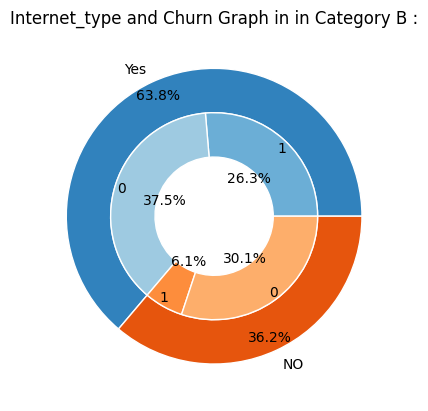

In [ ]:
Internet_type_1_1_b = len(dfb[(df['Churn']==1) & (df['Internet_type']==1)])
Internet_type_1_0_b = len(dfb[(df['Churn']==0) & (df['Internet_type']==1)])

Internet_type_0_1_b = len(dfb[(df['Churn']==1) & (df['Internet_type']==0)])
Internet_type_0_0_b = len(dfb[(df['Churn']==0) & (df['Internet_type']==0)])

ig, ax = plt.subplots()
size = 0.3

cmap = plt.colormaps["tab20c"]
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap([1, 2, 5,6])

circle1 = [Internet_type_1_1_b + Internet_type_1_0_b , Internet_type_0_1_b + Internet_type_0_0_b]
circle2 = [Internet_type_1_1_b , Internet_type_1_0_b , Internet_type_0_1_b , Internet_type_0_0_b]

ax.pie(circle1, radius=1, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'),autopct='%.1f%%',pctdistance=0.9,
       labels= ['Yes', 'NO'],labeldistance=1.1 )

ax.pie(circle2, radius=1-size, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'),autopct='%.1f%%',pctdistance=0.5,
       labels=['1','0','1','0'] , labeldistance=0.9)

ax.set(aspect="equal")
ax.set_title('Internet_type and Churn Graph in Category B :',x=0.5,y=1)
#plt.legend(['Two year','One year','Month to Month','Churn 1', 'Churn 0','Churn 0','Churn 1','Churn 0','Churn 1'],bbox_to_anchor=(1,0.65), ncol=1)
plt.show()

##############################################################################################################################################

Internet_type_1_1_c = len(dfc[(df['Churn']==1) & (df['Internet_type']==1)])
Internet_type_1_0_c = len(dfc[(df['Churn']==0) & (df['Internet_type']==1)])

Internet_type_0_1_c = len(dfc[(df['Churn']==1) & (df['Internet_type']==0)])
Internet_type_0_0_c = len(dfc[(df['Churn']==0) & (df['Internet_type']==0)])

ig, ax = plt.subplots()
size = 0.3

cmap = plt.colormaps["tab20c"]
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap([1, 2, 5,6])

circle1 = [Internet_type_1_1_c + Internet_type_1_0_c , Internet_type_0_1_c + Internet_type_0_0_c]
circle2 = [Internet_type_1_1_c , Internet_type_1_0_c , Internet_type_0_1_c , Internet_type_0_0_c]

ax.pie(circle1, radius=1, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'),autopct='%.1f%%',pctdistance=0.9,
       labels= ['Yes', 'NO'],labeldistance=1.1 ,)

ax.pie(circle2, radius=1-size, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'),autopct='%.1f%%',pctdistance=0.5,
       labels=['1','0','1','0'] , labeldistance=0.9)

ax.set(aspect="equal")
ax.set_title('Internet_type and Churn Graph in in Category B :',x=0.5,y=1)
#plt.legend(['Two year','One year','Month to Month','Churn 1', 'Churn 0','Churn 0','Churn 1','Churn 0','Churn 1'],bbox_to_anchor=(1,0.65), ncol=1)
plt.show()

#Things which are ploted does not have nay insight.

In [ ]:
total_men_churn = (df[df['Gender']==1]).Churn.sum()
total_men = (df[df['Gender']==1]).shape[0]
percentage_churn_men = total_men_churn/(total_men)*100
print('churn percentage of males',percentage_churn_men) #churn percentage of males

total_women_churn = (df[df['Gender']==0]).Churn.sum()
total_women = (df[df['Gender']==0]).shape[0]
percentage_churn_women = total_women_churn/(total_women)*100
print('churn percentage of Females :',percentage_churn_women)

plt.figure(figsize=(5,3))
plt.bar(['Male','Female'],[percentage_churn_men,percentage_churn_women],edgecolor='black')
plt.xlabel('Churn %')
plt.ylabel('Percentage')
plt.title('Churn % in terms of Gender ')
plt.show()

#**Machine Learning Model**

In [ ]:
df = pd.read_csv('/content/train (4).csv')    # reading dataset

The Total Charges columns contain (' ') replacing it with median of total charges.

In [ ]:
lst = [2382,2551,3622,4671,4678,4991,5247,2067]
df.loc[lst,'Total_Charges']= np.nan
 # replacing values with the median
df.loc[lst,'Total_Charges']= df['Total_Charges'].median()
df.drop(columns= 'Customer_ID',inplace = True)  # dropping the column Customer ID

Changing Values into numerical for fiiting into Model

In [ ]:


for i in range(df.shape[0]):
    if df.at[i,'Gender'] == 'Male':
        df.at[i,'Gender'] = 1
    else:
        df.at[i,'Gender'] = 0


for i in range(df.shape[0]):
    if df.at[i,'Partner'] == 'Yes':
        df.at[i,'Partner'] = 1
    else:
        df.at[i,'Partner'] = 0

for i in range(df.shape[0]):
    if df.at[i,'Dependents'] == 'Yes':
        df.at[i,'Dependents'] = 1
    else:
        df.at[i,'Dependents'] = 0


for i in range(df.shape[0]):
    if df.at[i,'Phone_Service'] == 'Yes':
        df.at[i,'Phone_Service'] = 1
    else:
        df.at[i,'Phone_Service'] = 0


for i in range(df.shape[0]):
    if df.at[i,'Multiple_Lines'] == 'Yes':
        df.at[i,'Multiple_Lines'] = 2
    elif df.at[i,'Multiple_Lines'] == 'No':
        df.at[i,'Multiple_Lines'] = 1
    else:
        df.at[i,'Multiple_Lines'] = 0


for i in range(df.shape[0]):
  if df.at[i,'Internet_Service'] == 'Fiber optic':                                                 # assigning 1 to fiber optic
    df.at[i,'Internet_Service'] = 1
  elif df.at[i,'Internet_Service'] == 'DSL':                                                       # assigning 0 to DSL
    df.at[i,'Internet_Service'] = 0
  else:
    df.at[i,'Internet_Service'] = 3


lst = ['Online_Security', 'Online_Backup',	'Device_Protection',	'Tech_Support',	'Streaming_TV','Streaming_Movies']    # doing this again and again is boring. So we used Loop.
for j in lst:
    for i in range(df.shape[0]):
        if df.at[i,j] == 'Yes':
            df.at[i,j] = 2
        elif df.at[i,j] == 'No':
            df.at[i,j] = 1
        else:
            df.at[i,j] = 0

for i in range(df.shape[0]):
    if df.at[i,'Contract'] == 'Two year':
        df.at[i,'Contract'] = 2                                                   # 2 to 2 Year
    elif df.at[i,'Contract'] == 'One year':
        df.at[i,'Contract'] = 1                                                   # 1 to 1 year
    else:
        df.at[i,'Contract'] = 0


for i in range(df.shape[0]):
    if df.at[i,'Paperless_Billing'] == 'Yes':
        df.at[i,'Paperless_Billing'] = 1
    else:
        df.at[i,'Paperless_Billing'] = 0

for i in range(df.shape[0]):
    if df.at[i,'Payment_Method'] == 'Electronic check':
        df.at[i,'Payment_Method'] = 2
    elif df.at[i,'Payment_Method'] == 'Bank transfer (automatic)':
        df.at[i,'Payment_Method'] = 1
    elif df.at[i,'Payment_Method'] == 'Credit card (automatic)':
        df.at[i,'Payment_Method'] = 3
    else:
        df.at[i,'Payment_Method'] = 0



for i in range(df.shape[0]):
    if df.at[i,'Churn'] == 'Yes':
        df.at[i,'Churn'] = 1
    else:
        df.at[i,'Churn'] = 0


df = df.apply(pd.to_numeric)

In [ ]:
y_axis = df[['Churn']]

In [ ]:
x_axis = ['Gender', 'Senior_Citizen', 'Partner', 'Dependents', 'Phone_Service',
       'Multiple_Lines', 'Internet_Service', 'Online_Security',
       'Online_Backup', 'Device_Protection', 'Tech_Support', 'Streaming_TV',
       'Streaming_Movies', 'Contract', 'Paperless_Billing', 'Payment_Method',
       'Monthly_Charges', 'Total_Charges']

#Using **Adaptive Boost Classifier** and **Decision Tree** -


In [ ]:
# Importing the required libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, Y_train, Y_test = train_test_split(df[x_axis], y_axis, test_size=0.2, random_state=0)       # Splitting the dataset into training and test data

base_classifier = DecisionTreeClassifier(max_depth=1)  # Create a base Decision Tree classifier

adaboost_classifier = AdaBoostClassifier(base_classifier, n_estimators=50, random_state=0)    # Create an AdaBoost classifier with Decision Trees as base estimators

adaboost_classifier.fit(X_train, Y_train)      # Fit the model on the training data

Y_pred = adaboost_classifier.predict(X_test)   # Make predictions on the test set

score = accuracy_score(Y_test, Y_pred)        # Computing the accuracy_score of the model
print(score)

0.8032166508987701


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
